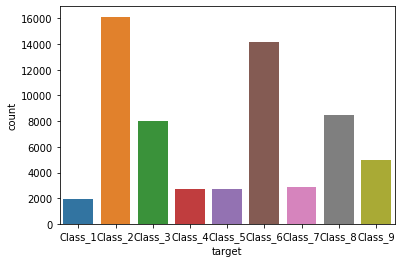

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#导入数据
df=pd.read_csv(r"D:\program_Lab_Report\machine_learning\100day\code\6_集成学习\otto.csv")
target=df["target"].unique()
# 图形可视化，查看数据分布
sns.countplot(df.target)
plt.show()


## 数据预处理
* 随机采样数据
* 数据划分

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  #标签数字化

le = LabelEncoder()
y=df.iloc[:,-1].values
y=le.fit_transform(y)
x=df.iloc[:,1:-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #随机采样

## 模型训练
sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, bootstrap=True,
random_state=None, min_samples_split=2)
* min_samples_split 内部节点再划分所需最⼩样本数
    * 这个值限制了⼦树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进⾏划分，默认是2。
    * 如果样本量不⼤，不需要管这个值。如果样本量数量级⾮常⼤，则推荐增⼤这个值。

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
#模型测试
test_pred=rf.predict(x_test)
print(test_pred)
test_score=rf.score(x_test,y_test)
print(test_score)

[8 2 1 ... 2 4 5]
0.809469941822883


## 模型优化
* n_estimators
* max_feature
* max_depth
* min_sample_leaf

### 确定最优的n_estimators
* n_estimators：integer，optional(default = 10)森林⾥的树⽊数量120,200,300,500,800,1200
    * 在利⽤最⼤投票数或平均值来预测之前，你想要建⽴⼦树的数量。

Text(0, 0.5, 'error_t')

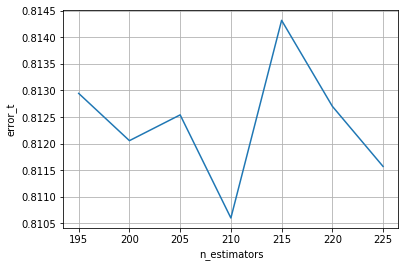

In [14]:
#import matplotlib.pyplot as plt
#import numpy as np
##确定n_esimators的取值范围
#tuned_parameters = range(195, 230, 5)  #每个数，间隔十
##创建添加accuracy的一个numpy
#accuracy_t = np.zeros(len(tuned_parameters))
##创建添加error的一个numpy
#error_t = np.zeros(len(tuned_parameters))
##调优过程实现
#for j, one_parameter in enumerate(tuned_parameters):
#    rf2 = RandomForestClassifier(n_estimators=one_parameter)
#    rf2.fit(x_train, y_train)
#    # 输出accuracy
#    accuracy_t[j] = rf2.score(x_test,y_test)
#    
#'''可视化优化过程'''   
#plt.plot(tuned_parameters,accuracy_t)
#plt.grid()
#plt.xlabel('n_estimators')
#plt.ylabel('error_t')

### 确定max_feature
* If "auto", then max_features=sqrt(n_features) .
* If "sqrt", then max_features=sqrt(n_features) (same as "auto").
* If "log2", then max_features=log2(n_features) .
* If None, then max_features=n_features .

In [15]:
#import numpy as np
##确定n_esimators的取值范围
#tuned_parameters =["auto","sqrt","log2"]  #每个数，间隔十
##创建添加accuracy的一个numpy
#accuracy_t = np.zeros(len(tuned_parameters))
##创建添加error的一个numpy
#error_t = np.zeros(len(tuned_parameters))
##调优过程实现
#for j, one_parameter in enumerate(tuned_parameters):
#    #print(j,one_parameter)
#    rf2 = RandomForestClassifier(n_estimators=175,
#                                max_features=one_parameter)
#    rf2.fit(x_train, y_train)
#    # 输出accuracy
#    accuracy_t[j] = rf2.score(x_test,y_test)
#    print(accuracy_t[j])

0.8122171945701357
0.8120555914673562
0.8082579185520362


Text(0, 0.5, 'accuracy_t')

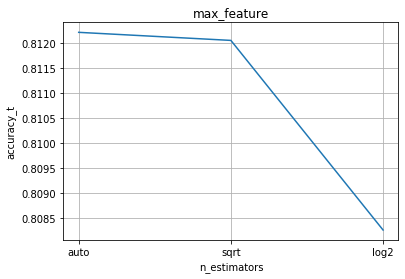

In [16]:
#import matplotlib.pyplot as plt
#'''可视化优化过程'''   
#plt.title("max_feature")
#plt.plot(tuned_parameters,accuracy_t)
#plt.grid()
#plt.xlabel('n_estimators')
#plt.ylabel('accuracy_t')

### 确定max_depth
* max_depth：integer或None，可选(默认=⽆)
    * 树的最⼤深度 5,8,15,25,30

In [19]:
import numpy as np
#确定n_esimators的取值范围
tuned_parameters =range(10,100,10)  #每个数，间隔十
#创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))
#创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))
#调优过程实现
for j, one_parameter in enumerate(tuned_parameters):
    #print(j,one_parameter)
    rf2 = RandomForestClassifier(n_estimators=215,
                                max_features="auto",
                                max_depth=one_parameter)
    rf2.fit(x_train, y_train)
    # 输出accuracy
    accuracy_t[j] = rf2.score(x_test,y_test)
    #print(accuracy_t[j])

Text(0, 0.5, 'accuracy_t')

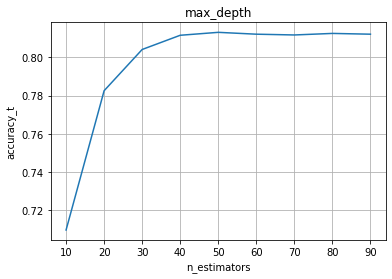

In [20]:
#import matplotlib.pyplot as plt
#'''可视化优化过程'''   
#plt.title("max_depth")
#plt.plot(tuned_parameters,accuracy_t)
#plt.grid()
#plt.xlabel('n_estimators')
#plt.ylabel('accuracy_t')

### 确定min_sample_leaf
* min_samples_leaf 叶⼦节点的最⼩样本数
    * 这个值限制了叶⼦节点最少的样本数，如果某叶⼦节点数⽬⼩于样本数，则会和兄弟节点⼀起被剪枝，默认是1。
    * 叶是决策树的末端节点。 较⼩的叶⼦使模型更容易捕捉训练数据中的噪声。
    * ⼀般来说，我更偏向于将最⼩叶⼦节点数⽬设置为⼤于50。

In [21]:
#import numpy as np
##确定n_esimators的取值范围
#tuned_parameters =range(10,100,10)  #每个数，间隔十
##创建添加accuracy的一个numpy
#accuracy_t = np.zeros(len(tuned_parameters))
##创建添加error的一个numpy
#error_t = np.zeros(len(tuned_parameters))
##调优过程实现
#for j, one_parameter in enumerate(tuned_parameters):
#    #print(j,one_parameter)
#    rf2 = RandomForestClassifier(n_estimators=215,
#                                max_features="auto",
#                                max_depth=50,
#                                min_samples_leaf=one_parameter)
#    rf2.fit(x_train, y_train)
#    # 输出accuracy
#    accuracy_t[j] = rf2.score(x_test,y_test)
#    #print(accuracy_t[j])

Text(0, 0.5, 'accuracy_t')

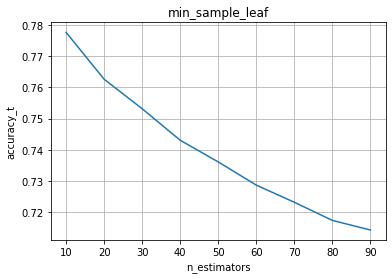

In [22]:
#import matplotlib.pyplot as plt
#'''可视化优化过程'''   
#plt.title("min_sample_leaf")
#plt.plot(tuned_parameters,accuracy_t)
#plt.grid()
#plt.xlabel('n_estimators')
#plt.ylabel('accuracy_t')

## 最优模型
* n_estimators=215,
* max_features="auto",
* max_depth=90

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=215,
                            max_features="auto",
                            max_depth=90
                            )
rf.fit(x_train, y_train)

test_score=rf.score(x_test,y_test)
print(test_score)

0.8119747899159664
